# Individual Assignment Question 2 

In [1]:
import pandas as pd
import numpy as np
import re

# For visualizations
import matplotlib.pyplot as plt
from collections import Counter 


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.1.


In [3]:
import os
os.getcwd()

'C:\\Users\\rifai\\OneDrive\\Queens University\\MMA\\MMA 865\\Individual Assignment'

# Load Data

In [4]:
df = pd.read_csv("sentiment_train.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2202 non-null   object
 1   Polarity  2202 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.5+ KB


,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
#Check if data is imbalanced
print('Train:')
df['Polarity'].value_counts()


Train:


0    1113
1    1089
Name: Polarity, dtype: int64

(array([2.198e+03, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.4020e+02, 2.7940e+02, 4.1860e+02, 5.5780e+02,
        6.9700e+02, 8.3620e+02, 9.7540e+02, 1.1146e+03, 1.2538e+03,
        1.3930e+03]),
 <BarContainer object of 10 artists>)

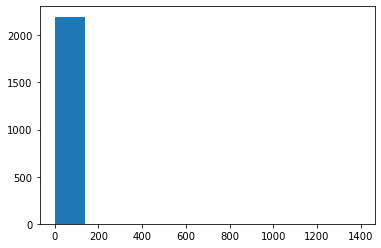

(array([2.198e+03, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([6.0000e+00, 8.0950e+02, 1.6130e+03, 2.4165e+03, 3.2200e+03,
        4.0235e+03, 4.8270e+03, 5.6305e+03, 6.4340e+03, 7.2375e+03,
        8.0410e+03]),
 <BarContainer object of 10 artists>)

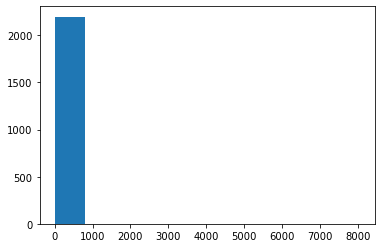

In [6]:
#New Features

#Word Count of each review
df['word_count'] = df['Sentence'].apply(lambda x: len(str(x).split(" ")))
plt.hist(df['word_count'])
plt.show()

#Character Count of each review
df['char_count'] = df['Sentence'].str.len() ## this also includes spaces
plt.hist(df['char_count'])
plt.show()

#Character count without punctuations
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
def count_characters(data_df):
    reviewcharacters = []
    text_col = data_df['Sentence']
    for i in text_col:
        a = dict(Counter(i))
        b = {k:v for k, v in a.items() if k not in punctuation}
        c = sum(list(b.values()))
        reviewcharacters.append(c)
    data_df['reviewChars'] = reviewcharacters
    return data_df['reviewChars']
df['reviewChars'] = count_characters(df)

#Number of Punctuations

def numpunct(data_df):
    reviewPuncts = []
    for i in data_df['Sentence']:
        a = dict(Counter(i))
        b = {k:v for k,v in a.items() if k in punctuation}
        c = sum(list(b.values()))
        reviewPuncts.append(c)
    data_df['reviewPuncts'] = reviewPuncts
    return data_df['reviewPuncts']
df['reviewPuncts'] = numpunct(df)

# Ratio of Punctuations to reviewc characters
def ratio_puncts_chars(data_df):
    return data_df['reviewPuncts'] / data_df['reviewChars']
df['ratiopunChar'] = ratio_puncts_chars(df)

#Number of Capital Words
def numcapwords(data_df):
    reviewCwords = []
    for i in data_df['Sentence']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        reviewCwords.append(c)
    data_df['reviewCwords'] = reviewCwords
    return data_df['reviewCwords']
df['reviewCwords'] = numcapwords(df)


#Sentiment Analysis 
from textblob import TextBlob
df['polarity_score']=df['Sentence'].apply(lambda x:TextBlob(x).sentiment.polarity)


# Custom Functions for Preprocessing and Feature Engineering

In [7]:
#pip install unidecode


In [8]:
#Text Preprocessing

# Remove ,,, from entries in name column
df['Sentence'] = df['Sentence'].str.replace(r'\,,,','')
df['Sentence'].unique()

#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['Sentence']=df['Sentence'].apply(lambda x:expand_contractions(x))

#Lowercase letters
df['Sentence']=df['Sentence'].str.lower()

#Remove digits and words containing digits 
df['Sentence']=df['Sentence'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations
#df['Sentence']=df['Sentence'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Commonly occuring words
freq = pd.Series(' '.join(df['Sentence']).split()).value_counts()[:10]
freq

#removal of commonly occuring irrelevant words
freq = list(freq)
df['Sentence'] = df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Sentence'].head()

#Count of rare words

freq_rare = pd.Series(' '.join(df['Sentence']).split()).value_counts()[-100:]
freq_rare

#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
df['Sentence'] = df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Sentence'].head()

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Sentence.nostopwords'] = df['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lemmatization

from textblob import Word
df['Sentence.nostopwords.LEMMATIZED'] = df['Sentence.nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))





array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.', ...,
       "Unfortunately, 'Cover Girl' is an example of how Hollywood used to exploit women for financial gain.  ",
       'Non-linear narration thus many flashbacks and every part are articulated quite well.  ',
       'The good cinematography also makes her and Monica Bellucci look very beautiful.  '],
      dtype=object)

the     1409
and      843
i        841
is       654
a        605
to       508
it       497
was      481
this     449
not      426
dtype: int64

0                             wow... loved this place.
1                                   crust is not good.
2            not tasty and the texture was just nasty.
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: Sentence, dtype: object

unacceptable.unless    1
drain.                 1
people.                1
delightful.            1
bay.                   1
                      ..
garbo,                 1
douchey                1
par                    1
favourite              1
sense.                 1
Length: 100, dtype: int64

0                             wow... loved this place.
1                                   crust is not good.
2            not tasty and the texture was just nasty.
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: Sentence, dtype: object

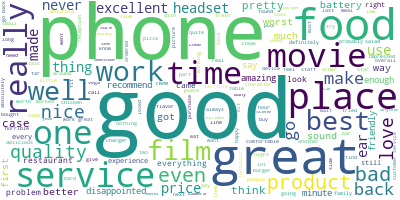

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['Sentence.nostopwords.LEMMATIZED'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


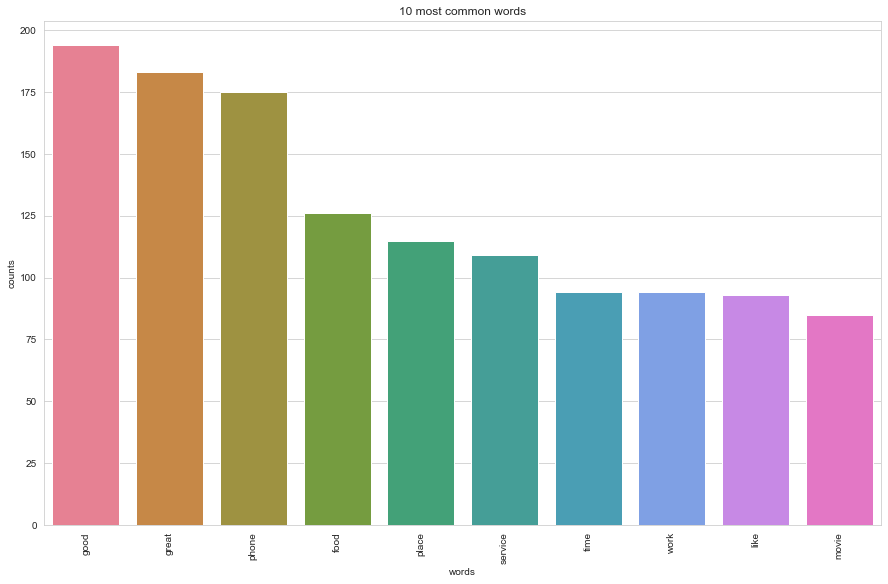

In [10]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['Sentence.nostopwords.LEMMATIZED'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [55]:
#Text to Vector 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=500, lowercase=True, stop_words = 'english', ngram_range=(1, 2))
#fit the vectorizers to the data.

features = vectorizer.fit_transform(df['Sentence.nostopwords.LEMMATIZED'])
pandaframe = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())



In [56]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=4,
                                      doc_topic_prior=None,
                                      topic_word_prior=None,
                                      max_iter=200, 
                                      learning_method='batch', 
                                      random_state=123,
                                      n_jobs=2,
                                      verbose=0)
lda_output = lda_model.fit(features)

# Log Likelyhood: Higher the better
ll = lda_model.score(features)

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
perp = lda_model.perplexity(features)

In [57]:
# Theta = document-topic matrix
# Beta = components_ = topic-term matrix
theta = pd.DataFrame(lda_model.transform(features))
beta = pd.DataFrame(lda_model.components_)

print('theta:')
theta.head()

#beta
print('beta:')
beta.head(20)




theta:


,0,1,2,3
0,0.111346,0.699238,0.092937,0.096480
1,0.127148,0.128417,0.127500,0.616936
2,0.624937,0.125019,0.125021,0.125023
3,0.125017,0.624944,0.125020,0.125020
4,0.714816,0.099308,0.092938,0.092938


beta:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,...,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,0.258598,0.258380,0.877023,0.257721,0.255805,0.250847,0.258950,0.252327,0.250530,1.683469,4.752268,2.449354,0.251902,1.767376,7.093555,4.378543,2.152957,0.251120,0.252042,0.255570,0.251543,0.257567,6.660510,0.251845,21.233841,5.506408,0.253918,3.952981,1.836156,0.255671,0.251203,0.250232,0.252040,4.885641,1.922259,0.260882,6.167720,0.260913,0.258910,0.254197,0.252181,0.250498,0.255590,0.256048,0.262703,9.897746,3.588289,0.254177,5.617315,0.255270,1.424790,2.087012,0.252152,2.800087,5.084045,14.430205,1.578934,2.086702,0.253640,0.259227,...,2.682810,0.251050,0.253123,0.250611,6.120586,1.504168,0.258251,0.256099,0.270090,0.252364,0.250992,4.957792,7.012953,0.259948,0.257571,0.257761,0.252706,0.251173,4.354938,0.267667,2.658425,0.261388,1.363572,2.224816,6.638479,2.254184,0.251668,0.250160,0.252011,0.250591,0.258100,0.253636,3.606563,0.257069,0.254018,0.253103,0.262483,0.256312,0.253548,4.475628,0.250346,2.340438,2.958568,34.882859,0.253088,10.482339,0.253182,0.258104,4.016697,1.235780,0.250518,0.259758,0.251777,2.199178,0.255199,0.260434,0.261055,0.250969,0.261146,0.250130
1,5.367490,4.288650,0.259524,0.251049,0.250428,0.254257,0.263701,0.265592,3.144738,0.250302,0.252976,0.256926,0.798092,2.206940,0.260018,0.260734,0.252147,4.099654,5.083277,0.250303,5.606733,4.397549,0.255037,0.252471,0.261213,0.263160,0.252623,0.254935,0.253857,0.253494,0.251269,4.109544,5.984283,0.258325,1.651419,9.129577,0.256428,3.857633,0.252390,0.261923,0.255999,2.412079,0.252497,0.254171,0.258495,0.256588,0.253511,2.024753,0.258578,0.252613,1.273121,2.674806,0.254395,0.252974,0.261376,0.252503,1.104968,0.261943,0.259898,8.039701,...,0.256930,1.341334,3.059357,0.253984,0.252224,2.186162,0.255326,0.255241,0.250331,6.185308,3.631413,0.259662,0.256146,0.253747,0.252904,0.250234,0.257955,0.250462,0.252695,1.453495,3.842580,1.202572,1.633328,3.079325,0.250233,0.250386,0.250958,0.250733,0.251147,0.253223,4.679357,0.265890,0.262786,14.474199,5.458326,0.250447,0.262696,0.251969,0.254277,0.261211,0.261067,2.800224,0.251947,0.255980,0.260098,0.251721,0.255046,6.888516,0.250243,3.248388,0.257616,0.254745,10.683621,0.971107,1.627453,0.255745,0.255393,0.250518,0.251890,0.250124
2,0.251721,0.254349,1.006747,0.258718,3.231963,0.255165,0.257037,4.691871,0.250341,0.250430,0.254998,3.152201,1.956095,0.274454,0.255445,0.251619,3.178289,0.251059,0.259453,0.254150,0.254654,0.254118,0.252639,0.251618,0.256532,1.407365,5.340307,0.252577,1.342243,23.800228,5.654289,0.252165,0.250498,0.250383,0.251128,20.575656,6.953215,1.426545,2.814305,4.731141,4.812270,0.265559,9.948975,4.094835,3.086149,0.255351,0.252494,0.259313,0.257504,4.154798,0.264972,3.260424,2.331875,0.252648,0.252355,0.253661,1.360030,0.270114,12.579945,0.252810,...,0.689923,0.257473,0.259708,0.254440,0.252354,0.255017,0.253681,0.255557,4.405044,0.258457,1.275995,0.257384,0.254725,4.842625,4.934172,0.250629,7.089453,4.989802,0.255426,2.432293,0.250716,0.262180,1.160561,0.263379,0.250462,0.266421,3.380952,0.250759,4.317050,1.754948,0.252291,2.310593,0.260068,0.256762,0.255134,2.979863,1.552419,10.621465,3.867731,0.261593,4.054287,0.259322,0.254362,0.263611,1.938927,0.253656,11.408532,0.269628,0.250283,0.254787,0.255000,0.254913,0.252150,0.250633,1.015334,5.573421,9.695428,2.491466,0.256361,0.250753
3,3.581398,0.267737,1.410276,4.354958,0.251138,15.502735,5.044661,0.255277,0.250920,1.815485,0.255741,0.252687,0.269086,0.257988,0.250387,0.252050,0.251275,0.251695,0.256970,6.172004,0.251017,7.829769,0.250839,3.986793,0.254184,0.257223,0.252194,0.250424,0.899162,0.255156,0.250805,0.252819,0.256290,0.274536,0.27171

In [58]:
# Build Topic Summary
feature_names = vectorizer.get_feature_names()
weight = theta.sum(axis=0)
support50 = (theta > 0.5).sum(axis=0)
support10 = (theta > 0.1).sum(axis=0)
termss = list()
for topic_id, topic in enumerate(lda_model.components_):
    terms = " ".join([feature_names[i] for i in topic.argsort()[:-6 - 1:-1]])
    termss.append(terms)
topic_summary = pd.DataFrame({'TopicID': range(0, len(termss)), "Support50": support50, "Support10": support10, "Weight": weight, "Terms": termss})

In [59]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 0)
topic_summary

,TopicID,Support50,Support10,Weight,Terms
0,0,434,1605,575.021178,service work love quality phone bad
1,1,458,1641,586.145007,great food place recommend excellent product
2,2,337,1562,518.869488,time battery disappointed best really phone
3,3,362,1559,521.964327,good like use worst think movie


In [60]:
df1=df[['word_count', 'char_count','polarity_score','Polarity','reviewChars','reviewPuncts','ratiopunChar','reviewCwords']]
df2= pd.concat([pandaframe.reset_index(drop=True), df1.reset_index(drop=True),theta], axis=1)

In [61]:
df2.info()
df2 = df2.replace([np.inf, -np.inf], np.nan)
df2["ratiopunChar"]=df2["ratiopunChar"].fillna(0)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Columns: 512 entries, absolutely to 3
dtypes: float64(506), int64(6)
memory usage: 8.6 MB


In [62]:
#The data was split to two parts 80% for training and 20% for testing. 
from sklearn.model_selection import train_test_split

# For X variable, the target variable ("label") was dropped since it will be predicted using the model.
X = df2.drop(["Polarity"], axis=1)

#For y variable, all other variabes are dropped. This variable will be used for assessing the model peformance using the AUC metric
y = df2["Polarity"]
# A random seed was assigned so that our results will be reproducible on the same machine

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df2["Polarity"].values)

In [63]:
#Downsampling 
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(random_state=42,replacement=False)
#X_train=X_train.to_numpy()
#X_train, y_train = rus.fit_resample(X_train, y_train)



In [64]:
#Logistic Regression classifier without hyperparameter tuning 

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=50000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=50000, random_state=42)

[[186  37]
 [ 41 177]]


(186, 37, 41, 177)

<AxesSubplot:>


F1 Score = 0.82313
AUC Score = 0.823

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       223
           1       0.83      0.81      0.82       218

    accuracy                           0.82       441
   macro avg       0.82      0.82      0.82       441
weighted avg       0.82      0.82      0.82       441



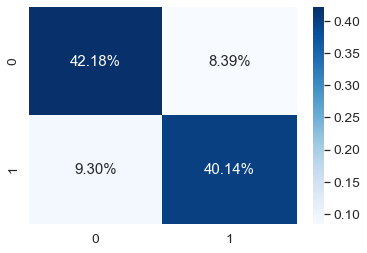

In [65]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, f1_score

# Predicting performance of hypertuned Logistic Regression model

pred_val = log_reg.predict(X_val)
#pred_val = XGB.predict(X_val)


#Get the confusion matrix
cf_matrix = confusion_matrix(y_val,pred_val)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_val,pred_val).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

print("\nF1 Score = {:.5f}".format(f1_score(y_val, pred_val, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(y_val, pred_val)))
print()
print(classification_report(y_val, pred_val))

#1 BOW: F1=0.71202, AUC= 0.711
#2 BOW + Count Features: F1=0.7188, AUC= 0.718
#3 BOW + Count Features + Polarity: F1=0.814, AUC= 0.814

# Create Submission File on Kaggle Hold-Out Data

In [66]:
test_df = pd.read_csv("sentiment_test.csv")


(array([545.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  80.9, 160.8, 240.7, 320.6, 400.5, 480.4, 560.3, 640.2,
        720.1, 800. ]),
 <BarContainer object of 10 artists>)

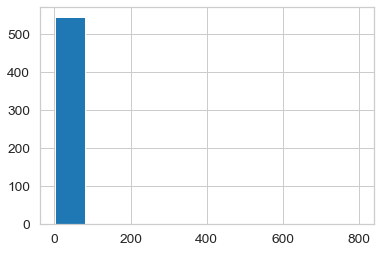

(array([544.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   6. ,  459.5,  913. , 1366.5, 1820. , 2273.5, 2727. , 3180.5,
        3634. , 4087.5, 4541. ]),
 <BarContainer object of 10 artists>)

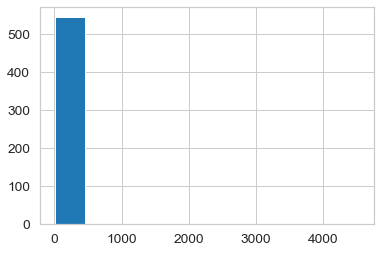

In [67]:
#New Features

#Word Count of each review
test_df['word_count'] = test_df['Sentence'].apply(lambda x: len(str(x).split(" ")))
plt.hist(test_df['word_count'])
plt.show()

#Character Count of each review
test_df['char_count'] = test_df['Sentence'].str.len() ## this also includes spaces
plt.hist(test_df['char_count'])
plt.show()

#Character count without punctuations
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
def count_characters(data_test_df):
    reviewcharacters = []
    text_col = data_test_df['Sentence']
    for i in text_col:
        a = dict(Counter(i))
        b = {k:v for k, v in a.items() if k not in punctuation}
        c = sum(list(b.values()))
        reviewcharacters.append(c)
    data_test_df['reviewChars'] = reviewcharacters
    return data_test_df['reviewChars']
test_df['reviewChars'] = count_characters(test_df)

#Number of Punctuations

def numpunct(data_test_df):
    reviewPuncts = []
    for i in data_test_df['Sentence']:
        a = dict(Counter(i))
        b = {k:v for k,v in a.items() if k in punctuation}
        c = sum(list(b.values()))
        reviewPuncts.append(c)
    data_test_df['reviewPuncts'] = reviewPuncts
    return data_test_df['reviewPuncts']
test_df['reviewPuncts'] = numpunct(test_df)

# Ratio of Punctuations to reviewc characters
def ratio_puncts_chars(data_test_df):
    return data_test_df['reviewPuncts'] / data_test_df['reviewChars']
test_df['ratiopunChar'] = ratio_puncts_chars(test_df)

#Number of Capital Words
def numcapwords(data_test_df):
    reviewCwords = []
    for i in data_test_df['Sentence']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        reviewCwords.append(c)
    data_test_df['reviewCwords'] = reviewCwords
    return data_test_df['reviewCwords']
test_df['reviewCwords'] = numcapwords(test_df)


#Sentiment Analysis 
from textblob import TextBlob
test_df['polarity_score']=test_df['Sentence'].apply(lambda x:TextBlob(x).sentiment.polarity)


,Sentence,word_count
0,A good commentary of today's love and undoubtedly a film worth seeing.,14
1,"For people who are first timers in film making, I think they did an excellent job!!",18
2,"It was very popular when I was in the cinema, a good house and very good reactions and plenty of...",23
3,It's a feel-good film and that's how I felt when I came out of the cinema!,18
4,It has northern humour and positive about the community it represents.,13


(array([545.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  80.9, 160.8, 240.7, 320.6, 400.5, 480.4, 560.3, 640.2,
        720.1, 800. ]),
 <BarContainer object of 10 artists>)

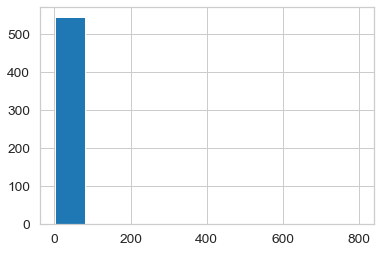

,Sentence,char_count
0,A good commentary of today's love and undoubtedly a film worth seeing.,72
1,"For people who are first timers in film making, I think they did an excellent job!!",85
2,"It was very popular when I was in the cinema, a good house and very good reactions and plenty of...",106
3,It's a feel-good film and that's how I felt when I came out of the cinema!,76
4,It has northern humour and positive about the community it represents.,72


(array([544.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   6. ,  459.5,  913. , 1366.5, 1820. , 2273.5, 2727. , 3180.5,
        3634. , 4087.5, 4541. ]),
 <BarContainer object of 10 artists>)

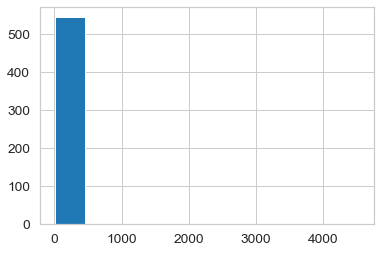

array(["A good commentary of today's love and undoubtedly a film worth seeing.  ",
       'For people who are first timers in film making, I think they did an excellent job!!  ',
       'It was very popular when I was in the cinema, a good house and very good reactions and plenty of laughs.  ',
       "It's a feel-good film and that's how I felt when I came out of the cinema!  ",
       'It has northern humour and positive about the community it represents.  ',
       'I rather enjoyed it.  ', 'I liked it.  ',
       "I couldn't take them seriously.  ",
       'It really created a unique feeling though.  ',
       'Vivian Schilling did an excellent job with the script.  ',
       'A world better than 95% of the garbage in the theatres today.  ',
       'Her role was played well.  ',
       'Not too screamy not to masculine but just right.  ',
       'The camera really likes her in this movie.  ',
       'I would have casted her in that role after ready the script.  ',
       "As a Euro

the     524
is      326
and     278
a       277
of      232
i       177
this    171
to      151
it      150
in      141
dtype: int64

0                                a good commentary of today is love and undoubtedly a film worth seeing.
1                    for people who are first timers in film making, i think they did an excellent job!!
2    it was very popular when i was in the cinema, a good house and very good reactions and plenty of...
3                           it is a feel-good film and that is how i felt when i came out of the cinema!
4                                 it has northern humour and positive about the community it represents.
Name: Sentence, dtype: object

enough,        1
angela         1
function,      1
typical        1
fumbling       1
              ..
bordered       1
revere,        1
dee            1
originality    1
sense.         1
Length: 100, dtype: int64

0                                a good commentary of today is love and undoubtedly a film worth seeing.
1                    for people who are first timers in film making, i think they did an excellent job!!
2    it was very popular when i was in the cinema, a good house and very good reactions and plenty of...
3                           it is a feel-good film and that is how i felt when i came out of the cinema!
4                                 it has northern humour and positive about the community it represents.
Name: Sentence, dtype: object

In [68]:
# Process Data 
#Text Preprocessing

#Word Count of each review
test_df['word_count'] = test_df['Sentence'].apply(lambda x: len(str(x).split(" ")))
test_df[['Sentence','word_count']].head()
plt.hist(test_df['word_count'])
plt.show()

#Character Count of each review
test_df['char_count'] = test_df['Sentence'].str.len() ## this also includes spaces
test_df[['Sentence','char_count']].head()
plt.hist(test_df['char_count'])
plt.show()

# Remove ,,, from entries in name column
test_df['Sentence'] = test_df['Sentence'].str.replace(r'\,,,','')
test_df['Sentence'].unique()

#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
test_df['Sentence']=test_df['Sentence'].apply(lambda x:expand_contractions(x))

#Lowercase letters
test_df['Sentence']=test_df['Sentence'].str.lower()

#Remove digits and words containing digits 
test_df['Sentence']=test_df['Sentence'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations
#test_df['Sentence']=test_df['Sentence'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Commonly occuring words
freq = pd.Series(' '.join(test_df['Sentence']).split()).value_counts()[:10]
freq

#removal of commonly occuring irrelevant words
freq = list(freq)
test_df['Sentence'] = test_df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
test_df['Sentence'].head()

#Count of rare words

freq_rare = pd.Series(' '.join(test_df['Sentence']).split()).value_counts()[-100:]
freq_rare

#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
test_df['Sentence'] = test_df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
test_df['Sentence'].head()

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
from nltk.corpus import stopwords
stop = stopwords.words('english')
test_df['Sentence.nostopwords'] = test_df['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lemmatization

from textblob import Word
test_df['Sentence.nostopwords.LEMMATIZED'] = test_df['Sentence.nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))



In [69]:
#Text Vectorizer  

#fit the vectorizers to the data

features3= vectorizer.transform(test_df['Sentence.nostopwords.LEMMATIZED'])
pandaframe3 = pd.DataFrame(features3.toarray(), columns=vectorizer.get_feature_names())

In [70]:
theta_test = pd.DataFrame(lda_model.transform(features3))




In [71]:
# Build Topic Summary
feature_names = vectorizer.get_feature_names()
weight = theta_test.sum(axis=0)
support50 = (theta_test > 0.5).sum(axis=0)
support10 = (theta_test > 0.1).sum(axis=0)
termss = list()
for topic_id, topic in enumerate(lda_model.components_):
    terms = " ".join([feature_names[i] for i in topic.argsort()[:-6 - 1:-1]])
    termss.append(terms)
topic_summary = pd.DataFrame({'TopicID': range(0, len(termss)), "Support50": support50, "Support10": support10, "Weight": weight, "Terms": termss})

In [72]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 0)
topic_summary

,TopicID,Support50,Support10,Weight,Terms
0,0,62,429,129.031524,service work love quality phone bad
1,1,110,474,164.835673,great food place recommend excellent product
2,2,43,408,111.198263,time battery disappointed best really phone
3,3,73,466,140.934541,good like use worst think movie


In [73]:
#Choose Features and combine word features with other features 
df4=test_df[['word_count', 'char_count','polarity_score','Polarity','reviewChars','reviewPuncts','ratiopunChar','reviewCwords']]
df5= pd.concat([pandaframe3.reset_index(drop=True), df4.reset_index(drop=True),theta_test], axis=1)

In [74]:
# Make sure to transform/create the features the same way you did for training
# For now, nothing to do

X_test = df5.drop(['Polarity'], axis=1)

# Use your model to make predictions
pred_test = log_reg.predict(X_test)

#pred_test = XGB.predict(X_test)


[[212  37]
 [ 91 206]]


(212, 37, 91, 206)

<AxesSubplot:>


F1 Score = 0.76557
AUC Score = 0.773

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       249
           1       0.85      0.69      0.76       297

    accuracy                           0.77       546
   macro avg       0.77      0.77      0.77       546
weighted avg       0.78      0.77      0.77       546



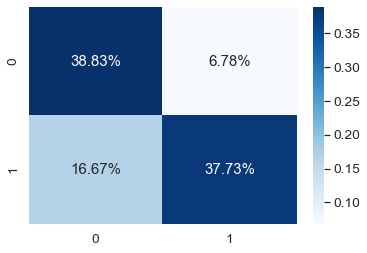

In [75]:
#Check performance on test dataset

y_val=df5['Polarity']
#Get the confusion matrix
cf_matrix = confusion_matrix(y_val,pred_test)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_val,pred_test).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

print("\nF1 Score = {:.5f}".format(f1_score(y_val, pred_test, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(y_val, pred_test)))
print()
print(classification_report(y_val, pred_test))